In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sstats
from glob import glob
import numpy as np

In [2]:
example_data = pd.read_csv('ssrt_metrics/indiv_guesses.csv', index_col=0)
example_data.columns = example_data.columns.str.replace('SSRT_', '')
melt_df = pd.melt(example_data, id_vars=['SSD'], value_vars=['SSRT','w_guesses','w_graded'], var_name = 'assumed_go_dist', value_name='SSRT')

In [3]:
example_data

,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD,w_guesses,w_graded
0,469.0,0.0,0.30372,1348.0,540.19522,248.826428,0,0.0,NaN,NaN,0.0,294.370663,NaN
1,440.0,50.0,0.37767,1348.0,540.19522,271.956488,0,0.0,NaN,NaN,50.0,292.367036,1824.0
2,394.0,100.0,0.38967,1348.0,540.19522,303.937685,0,0.0,NaN,NaN,100.0,295.422300,497.0
3,356.0,150.0,0.43150,1348.0,540.19522,341.234665,0,0.0,NaN,NaN,150.0,296.000000,549.0
4,323.0,200.0,0.49140,1348.0,540.19522,389.010074,0,0.0,NaN,NaN,200.0,292.000000,469.0
5,306.0,250.0,0.59971,1348.0,540.19522,426.166085,0,0.0,NaN,NaN,250.0,290.000000,425.0
6,294.0,300.0,0.70716,1348.0,540.19522,456.560453,0,0.0,NaN,NaN,300.0,285.000000,390.0
7,285.0,350.0,0.79928,1348.0,540.19522,482.520279,0,0.0,NaN,NaN,350.0,281.000000,362.0
8,280.0,400.0,0.87345,1348.0,540.19522,498.779934,0,0.0,NaN,NaN,400.0,278.000000,339.0
9,279.0,450.0,0.92498,1348.0,540.19522,513.712145,0,0.0,NaN,NaN,450.0,279.000000,316.0


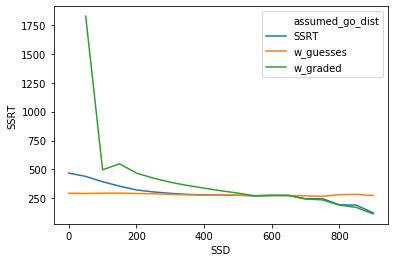

In [4]:
_ = sns.lineplot(x='SSD', y='SSRT', hue='assumed_go_dist', data=melt_df)

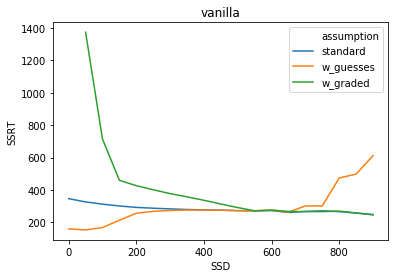

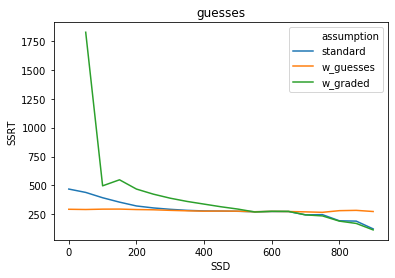

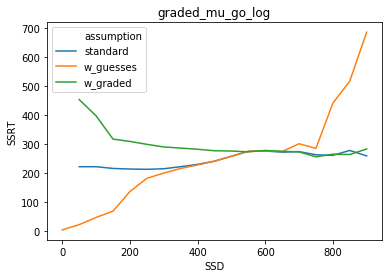

In [12]:
p_respond_df = pd.DataFrame(index = example_data.mean_SSD)

for file in [i for i in glob('ssrt_metrics/indiv_*.csv') if 'linear' not in i]:
    data =  pd.read_csv(file, index_col=0)
    data.columns = data.columns.str.replace('SSRT_', '')
    data = data.rename(columns={'SSRT': 'standard'})
    melt_df = pd.melt(data, id_vars=['SSD'], value_vars=['standard','w_guesses','w_graded'], var_name = 'assumption', value_name='SSRT')
    _ = sns.lineplot(x='SSD', y='SSRT', hue='assumption', data=melt_df)
    title = file.split('indiv_')[-1].replace('.csv', '')
    plt.title(title)
    plt.show()
    plt.close()
    curr_series = data.loc[:,['mean_SSD', 'p_respond']].set_index('mean_SSD').add_prefix(title+'_')
    p_respond_df = pd.concat([p_respond_df, curr_series], 1)

In [10]:
data

,standard,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD,w_guesses,w_graded
0,347.0,0.0,0.02698,1638.0,539.29291,379.747961,0,0.0,NaN,NaN,0.0,160.834017,NaN
1,327.0,50.0,0.06473,1638.0,539.29291,391.240692,0,0.0,NaN,NaN,50.0,154.234121,1373.0
2,313.0,100.0,0.13886,1638.0,539.29291,404.612847,0,0.0,NaN,NaN,100.0,168.771891,715.0
3,302.0,150.0,0.25133,1638.0,539.29291,423.346079,0,0.0,NaN,NaN,150.0,213.845240,460.0
4,293.0,200.0,0.39262,1638.0,539.29291,442.514212,0,0.0,NaN,NaN,200.0,257.000000,427.0
5,288.0,250.0,0.54515,1638.0,539.29291,461.300266,0,0.0,NaN,NaN,250.0,269.000000,402.0
6,284.0,300.0,0.68301,1638.0,539.29291,479.937307,0,0.0,NaN,NaN,300.0,274.000000,378.0
7,280.0,350.0,0.79277,1638.0,539.29291,495.793698,0,0.0,NaN,NaN,350.0,277.000000,358.0
8,278.0,400.0,0.87106,1638.0,539.29291,508.984444,0,0.0,NaN,NaN,400.0,276.650390,337.0
9,276.0,450.0,0.92387,1638.0,539.29291,518.817150,0,0.0,NaN,NaN,450.0,276.000000,314.0
